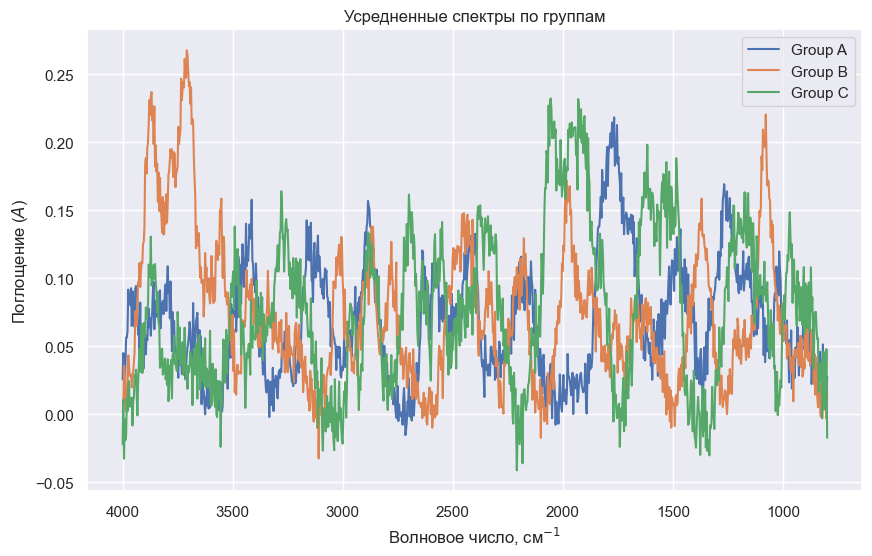

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# Настройки
sns.set_theme()
np.random.seed(42)

# Генерация данных
wavenumbers = np.linspace(4000, 800, 1000)
n_spectra = 50
groups = ['A', 'B', 'C']

def generate_spectrum(wavenumbers, peak_count=5):
    spectrum = np.zeros_like(wavenumbers)
    peak_positions = np.random.choice(wavenumbers, size=peak_count, replace=False)
    peak_widths = np.random.uniform(10, 50, size=peak_count)
    peak_heights = np.random.uniform(0.2, 1.0, size=peak_count)
    for pos, width, height in zip(peak_positions, peak_widths, peak_heights):
        spectrum += height * np.exp(-((wavenumbers - pos) ** 2) / (2 * width ** 2))
    spectrum += np.random.normal(scale=0.05, size=wavenumbers.shape)
    return spectrum

spectra = np.array([generate_spectrum(wavenumbers) for _ in range(n_spectra)])
spectra_df = pd.DataFrame(spectra, columns=wavenumbers)
spectra_df.index = [f'Spectrum_{i}' for i in range(n_spectra)]
spectra_df['Group'] = np.random.choice(groups, size=n_spectra)

# Усреднение
mean_spectra = spectra_df.groupby('Group').mean()

# Визуализация
plt.figure(figsize=(10, 6))
for group, spectrum in mean_spectra.iterrows():
    plt.plot(wavenumbers, spectrum[:], label=f'Group {group}')
plt.title('Усредненные спектры по группам')
plt.xlabel('Волновое число, см$^{-1}$')
plt.ylabel('Поглощение ($A$)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()


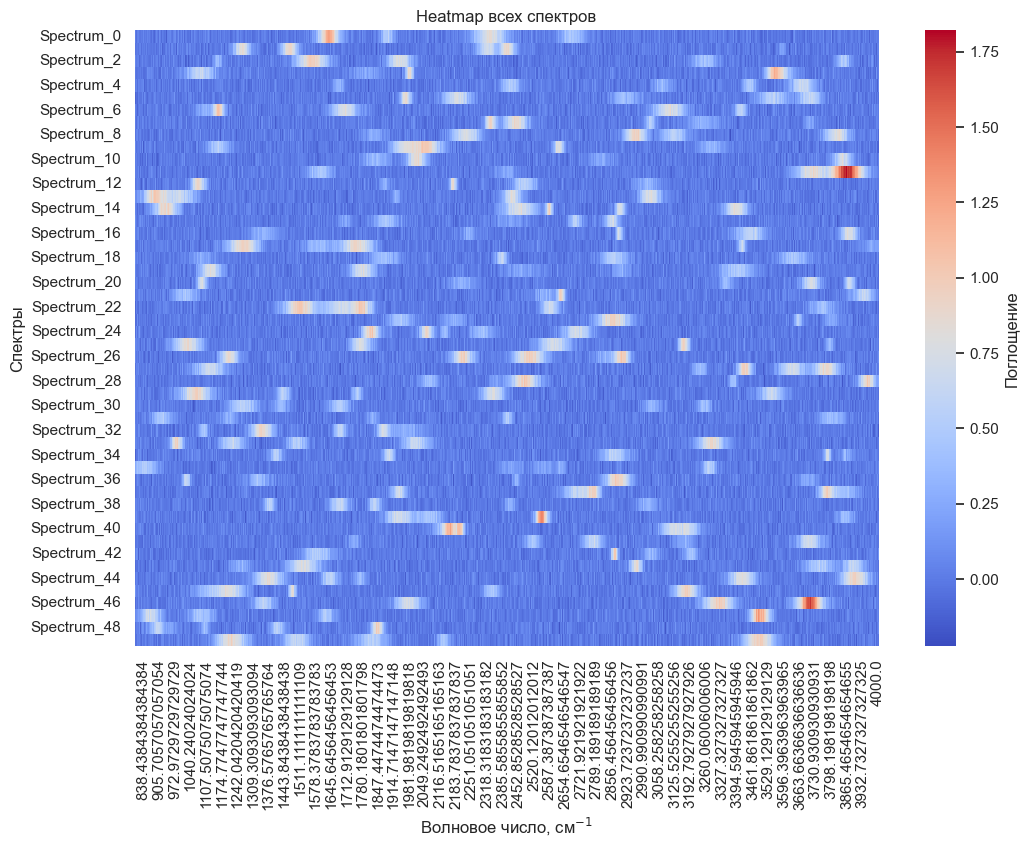

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(spectra_df.iloc[:, :-1], cmap='coolwarm', cbar_kws={'label': 'Поглощение'})
plt.title('Heatmap всех спектров')
plt.xlabel('Волновое число, см$^{-1}$')
plt.ylabel('Спектры')
plt.gca().invert_xaxis()
plt.show()


/var/folders/gn/6xkn0qgj31j3r_95lg2kqbv00000gn/T/ipykernel_45253/2329517515.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=spectra_df.iloc[:, :-1].values.T, shade=True, cmap='magma')


AttributeError: Patch.set() got an unexpected keyword argument 'cmap'

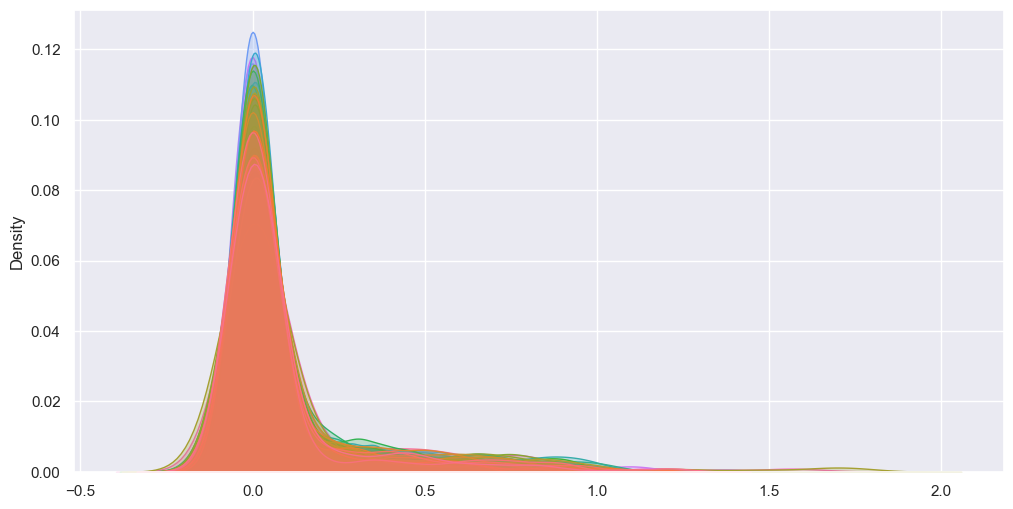

In [5]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=spectra_df.iloc[:, :-1].values.T, shade=True, cmap='magma')
plt.title('Градиентные карты интенсивностей спектров')
plt.xlabel('Волновое число, см$^{-1}$')
plt.ylabel('Плотность')
plt.gca().invert_xaxis()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


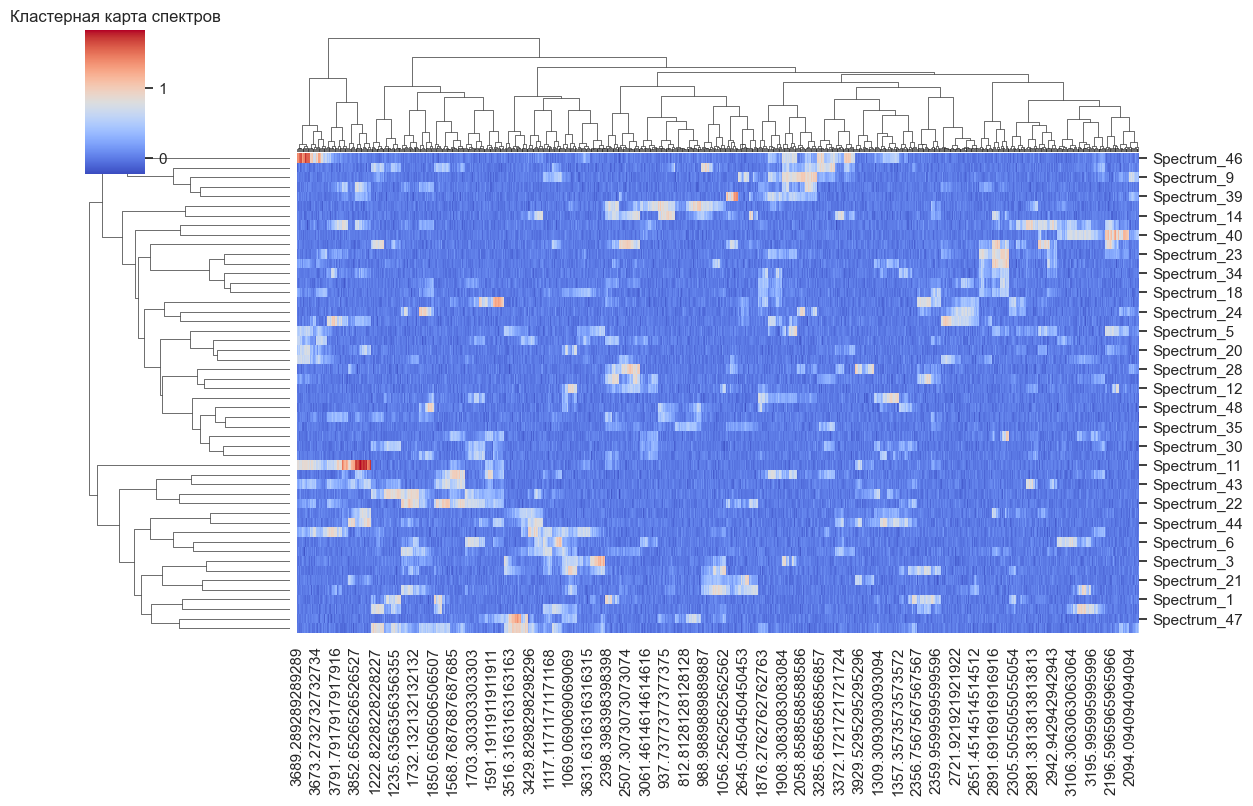

In [6]:
sns.clustermap(spectra_df.iloc[:, :-1], cmap='coolwarm', metric='euclidean', method='ward', figsize=(12, 8))
plt.title('Кластерная карта спектров')
plt.show()


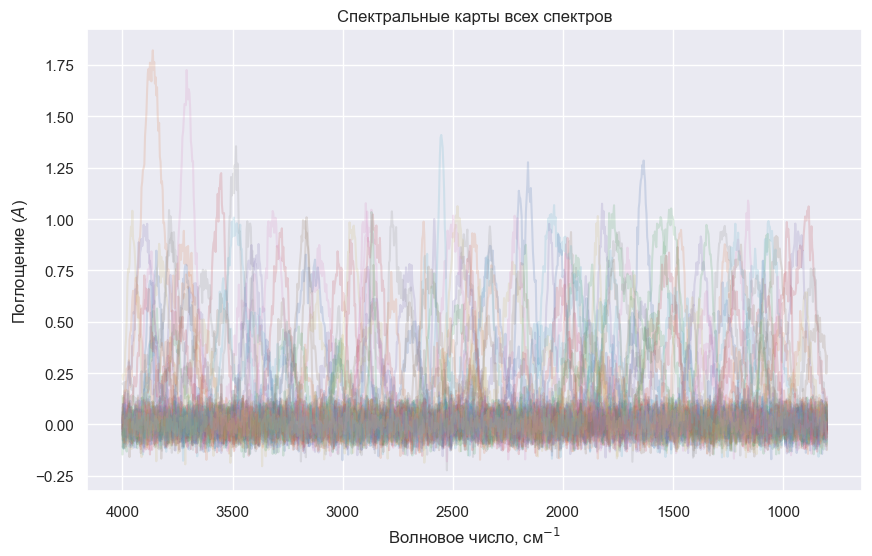

In [7]:
plt.figure(figsize=(10, 6))
for i, spectrum in spectra_df.iloc[:, :-1].iterrows():
    plt.plot(wavenumbers, spectrum, alpha=0.2)
plt.title('Спектральные карты всех спектров')
plt.xlabel('Волновое число, см$^{-1}$')
plt.ylabel('Поглощение ($A$)')
plt.gca().invert_xaxis()
plt.show()


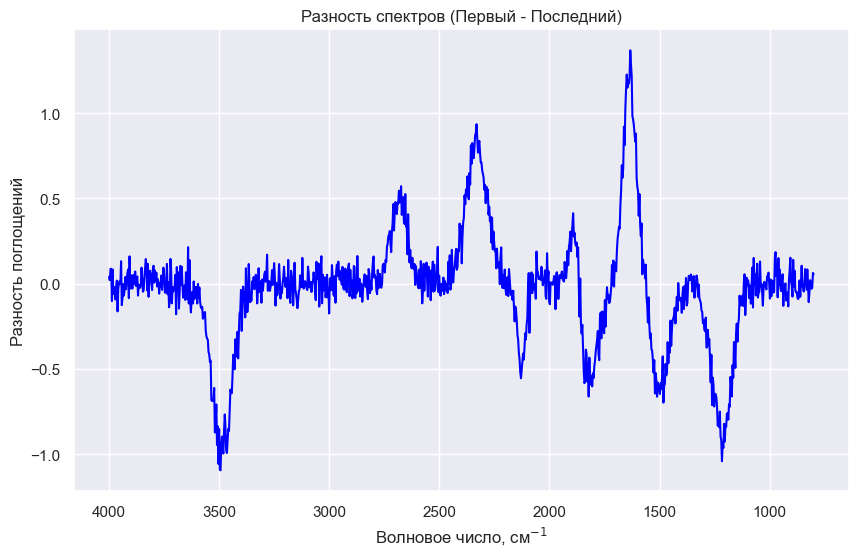

In [8]:
diff_spectrum = spectra_df.iloc[0, :-1] - spectra_df.iloc[-1, :-1]
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, diff_spectrum, color='blue')
plt.title('Разность спектров (Первый - Последний)')
plt.xlabel('Волновое число, см$^{-1}$')
plt.ylabel('Разность поглощений')
plt.gca().invert_xaxis()
plt.show()


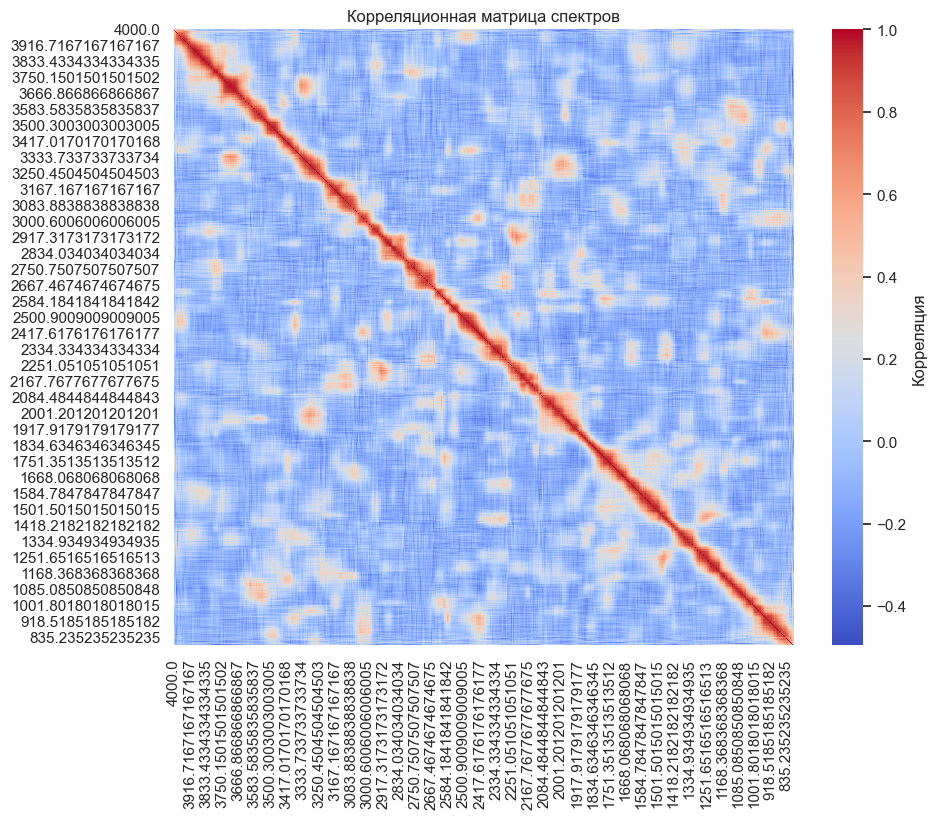

In [9]:
corr_matrix = spectra_df.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar_kws={'label': 'Корреляция'})
plt.title('Корреляционная матрица спектров')
plt.show()


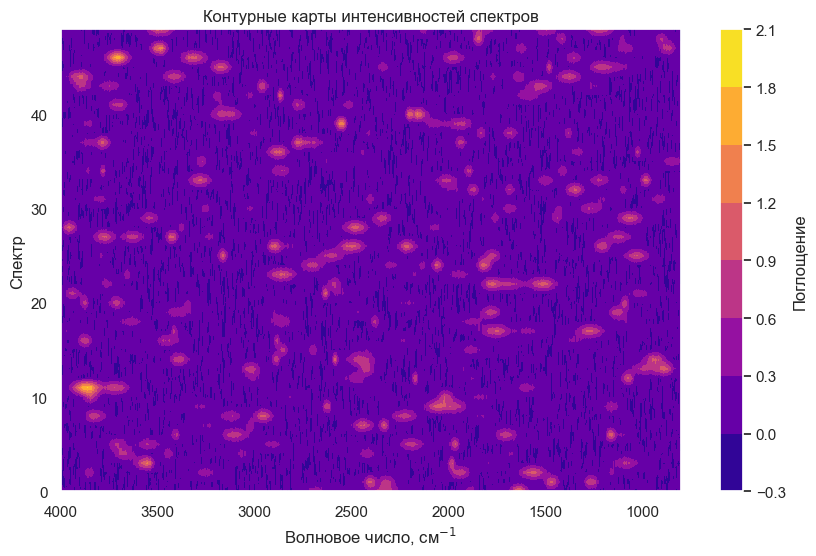

In [10]:
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(wavenumbers, range(n_spectra))
plt.contourf(X, Y, spectra_df.iloc[:, :-1], cmap='plasma')
plt.title('Контурные карты интенсивностей спектров')
plt.xlabel('Волновое число, см$^{-1}$')
plt.ylabel('Спектр')
plt.gca().invert_xaxis()
plt.colorbar(label='Поглощение')
plt.show()
